___
# Ciência dos Dados - PROJETO 1

## Leonardo costa, Allan Singer
___

___
## Introdução

Neste projeto tentamos entender, separadamente, as características das mulheres e dos homens que são chefes de família, isto é, mergulhar no âmbito da desiguladade de gênero do país brasileiro considerando as diferenças raciais e socio-economicas da população.  


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/allansinger/Documents/INSPER/3 semestre/Ciencia dos dados dp/Projeto 1


___
## Filtros para base de dados

In [3]:
#Se usar o arquivo descompactado
pes15 = pd.read_csv('PES2015.csv',sep=',')
pes11 = pd.read_csv('PES2011.csv',sep=',')


#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
pes11.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000.0,1,1,2,25,12,1961,49,...,4.0,1.000000e+12,99.0,2,1.0,2.0,2.0,1.0,1.000000e+12,20100000.0
1,2011,11,11000000.0,1,2,4,1,4,1978,33,...,4.0,1.000000e+12,99.0,6,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
2,2011,11,11000000.0,1,3,4,15,6,1996,15,...,4.0,1.000000e+12,99.0,3,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
3,2011,11,11000000.0,1,4,2,3,12,2001,9,...,4.0,1.000000e+12,99.0,2,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
4,2011,11,11000000.0,2,1,4,16,10,1959,51,...,4.0,1.461000e+03,5.0,4,1.0,2.0,2.0,1.0,1.461000e+03,20100000.0


In [5]:
pes15.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


In [6]:
df15 = pes15.loc[(pes15.V0402==1)&(pes15.V4718<90000000000)&(pes15.V4801>0)&(pes15.V8005>14)&(pes15.V8005<65),['V0302','V0402','V0404','V8005','V4801','V4718']]
df15 = df15.rename(columns = {'UF':'REGIAO','V0302':'Sexo','V0402':'Condicao','V0404':'Raça','V4718':'Renda','V4801':'Escolaridade','V8005':'Idade'})
df15.head()

,Sexo,Condicao,Raça,Idade,Escolaridade,Renda
2,4,1,8,35,25.0,880.0
25,4,1,4,50,25.0,1800.0
38,2,1,8,24,25.0,2200.0
109,2,1,8,33,25.0,2000.0
127,2,1,2,52,25.0,2000.0


In [50]:
df11 = pes11.loc[(pes11.V0402==1)&(pes11.V9532<90000000000)&(pes11.V6007>0)&(pes11.V8005>14)&(pes11.V8005<65),['V0302','V9532']]
df11 = df11.rename(columns = {'V9532':'Renda','V0302':'Sexo'})
df11.Sexo = df11['Sexo'].astype('category')
df11.Sexo.cat.categories = (['Masc','Fem'])
df11.head()

,Sexo,Renda
4,Fem,2800.0
21,Masc,1500.0
26,Masc,1000.0
29,Fem,1800.0
31,Masc,1300.0


In [7]:
df15.Sexo = df15['Sexo'].astype('category')
df15.Sexo.cat.categories = (['Masc','Fem'])
df15.Condicao = df15['Condicao'].astype('category')
df15.Condicao.cat.categories = (['Pessoa de Referencia'])
df15.Raça = df15['Raça'].astype('category')
df15.Raça.cat.categories = (['Indígena','Branca','Preta','Amarela','Parda'])
df15.Escolaridade = df15['Escolaridade'].astype('category')
df15.Escolaridade.cat.categories = (['Alfabetizado','1°Série(8 anos)','2°Série(8 anos)','3°Série(8 anos)','4°Série(8 anos)','5°Série(8 anos)','6°Série(8 anos)','7°Série(8 anos)','8°Série(8 anos)','1°Série(9 anos)','2°Série(9 anos)','3°Série(9 anos)','4°Série(9 anos)','5°Série(9 anos)','6°Série(9 anos)','7°Série(9 anos)','8°Série(9 anos)','9°Série(9 anos)','Ensino Fundamental Completo','Regular do Ensino Médio','Ensino Médio Completo','Pré-Vestibular','Ensino Superior'])
df15.head()

,Sexo,Condicao,Raça,Idade,Escolaridade,Renda
2,Fem,Pessoa de Referencia,Parda,35,Ensino Superior,880.0
25,Fem,Pessoa de Referencia,Preta,50,Ensino Superior,1800.0
38,Masc,Pessoa de Referencia,Parda,24,Ensino Superior,2200.0
109,Masc,Pessoa de Referencia,Parda,33,Ensino Superior,2000.0
127,Masc,Pessoa de Referencia,Branca,52,Ensino Superior,2000.0


___
## Análise por sexo (masculino depois feminino)

In [24]:
df15['Sexo'].value_counts()

Masc    1917
Fem     1447
Name: Sexo, dtype: int64

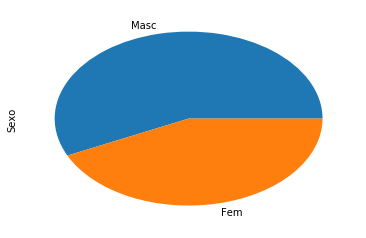

In [9]:
df15['Sexo'].value_counts().plot.pie();

### Renda 

In [10]:
df15.Renda[df15.Sexo == "Masc"].describe()

count     1917.000000
mean      2558.493479
std       2726.460500
min          0.000000
25%       1000.000000
50%       1800.000000
75%       3000.000000
max      35000.000000
Name: Renda, dtype: float64

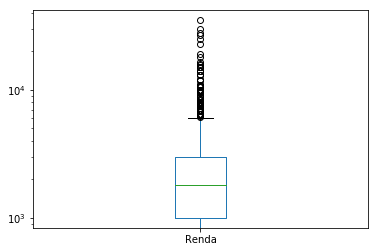

In [29]:
df15.Renda[df15.Sexo == "Masc"].plot.box(logy=True);

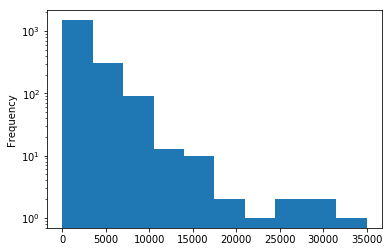

In [32]:
df15.Renda[df15.Sexo == "Masc"].plot.hist(logy = True);

In [25]:
df15.Renda[df15.Sexo == "Fem"].describe()

count     1447.000000
mean      1650.982032
std       1799.323345
min          0.000000
25%        788.000000
50%       1100.000000
75%       1912.000000
max      20000.000000
Name: Renda, dtype: float64

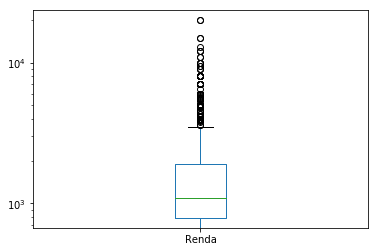

In [28]:
df15.Renda[df15.Sexo == "Fem"].plot.box(logy=True);
#usar log pois a renda possui ordem de grandeza grande

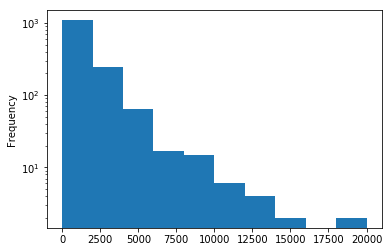

In [31]:
df15.Renda[df15.Sexo == "Fem"].plot.hist(logy = True);

### Escolaridade 

In [11]:
df15.Escolaridade[df15.Sexo == "Masc"].value_counts()

Ensino Superior                1429
Regular do Ensino Médio         168
Ensino Fundamental Completo     122
Ensino Médio Completo           119
Alfabetizado                     21
8°Série(9 anos)                  10
9°Série(9 anos)                   8
6°Série(9 anos)                   6
8°Série(8 anos)                   5
1°Série(9 anos)                   4
7°Série(9 anos)                   4
4°Série(8 anos)                   4
4°Série(9 anos)                   3
1°Série(8 anos)                   3
5°Série(9 anos)                   2
3°Série(8 anos)                   2
2°Série(8 anos)                   2
2°Série(9 anos)                   1
7°Série(8 anos)                   1
6°Série(8 anos)                   1
5°Série(8 anos)                   1
3°Série(9 anos)                   1
Pré-Vestibular                    0
Name: Escolaridade, dtype: int64

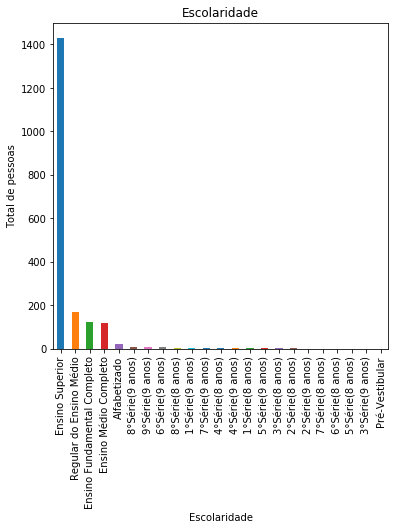

In [34]:
plot = df15.Escolaridade[df15.Sexo == "Masc"].value_counts().plot(kind='bar',title='Escolaridade',figsize=(6, 6))
plt.ylabel('Total de pessoas')
plt.xlabel('Escolaridade')
plt.show()

In [13]:
df15.Escolaridade[df15.Sexo == "Fem"].value_counts()

Ensino Superior                1057
Regular do Ensino Médio         146
Ensino Médio Completo           108
Ensino Fundamental Completo      89
Alfabetizado                     15
9°Série(9 anos)                   9
7°Série(9 anos)                   3
6°Série(9 anos)                   2
5°Série(9 anos)                   2
3°Série(8 anos)                   2
4°Série(8 anos)                   2
5°Série(8 anos)                   2
6°Série(8 anos)                   2
7°Série(8 anos)                   1
1°Série(8 anos)                   1
8°Série(8 anos)                   1
8°Série(9 anos)                   1
2°Série(9 anos)                   1
Pré-Vestibular                    1
4°Série(9 anos)                   1
3°Série(9 anos)                   1
1°Série(9 anos)                   0
2°Série(8 anos)                   0
Name: Escolaridade, dtype: int64

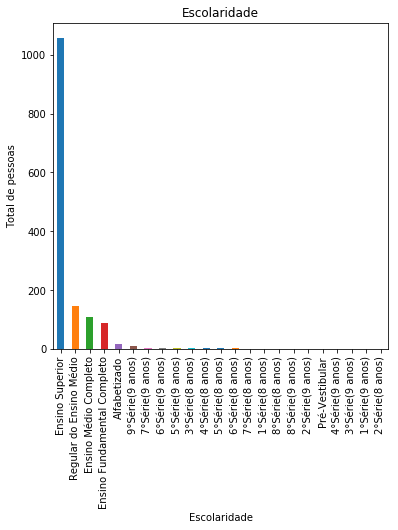

In [33]:
plot = df15.Escolaridade[df15.Sexo == "Fem"].value_counts().plot(kind='bar',title='Escolaridade',figsize=(6, 6))
plt.ylabel('Total de pessoas')
plt.xlabel('Escolaridade')
plt.show()

### Raça 

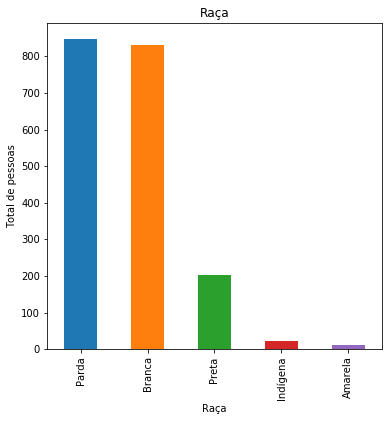

In [37]:
plot = df15.Raça[df15.Sexo == "Masc"].value_counts().plot(kind='bar',title='Raça',figsize=(6, 6))
plt.ylabel('Total de pessoas')
plt.xlabel('Raça')
plt.show()

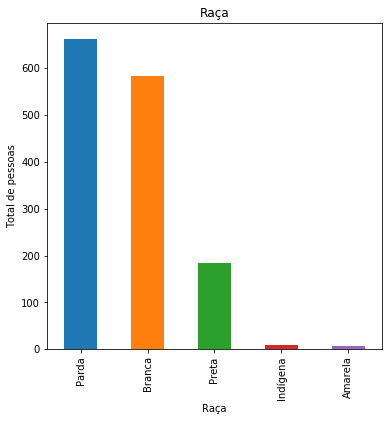

In [36]:
plot = df15.Raça[df15.Sexo == "Fem"].value_counts().plot(kind='bar',title='Raça',figsize=(6, 6))
plt.ylabel('Total de pessoas')
plt.xlabel('Raça')
plt.show()

A partir da análise de dados feita, observa-se que a renda masculina é, em média, superior à feminina. Ao contrário da raça e da escolaridade, a qual não há uma grande dicrepância entre os dois gêneros.

Assim, a diferença de renda entre os gêneros passa a ser nosso foco de análise, podendo observar a esperada diminuição dessa diferença entre os anos de 2011 e 2015.


___
## Conclusão 

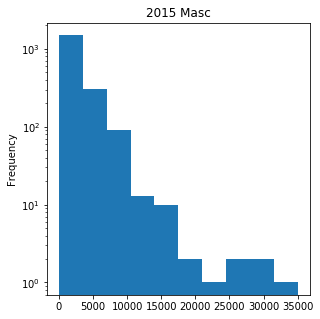

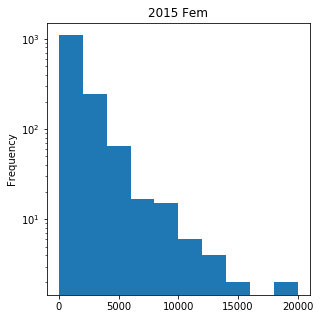

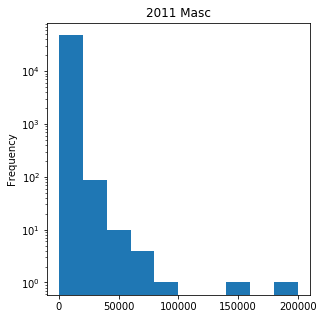

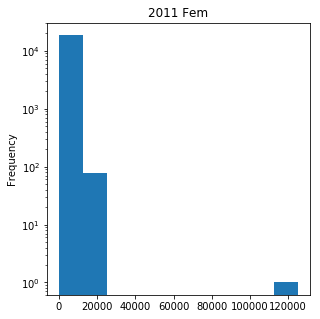

In [60]:
fig = plt.figure(figsize=(16, 5))
plt.subplot(131)
df15.Renda[df15.Sexo == "Masc"].plot.hist(logy = True, title = '2015 Masc');

fig = plt.figure(figsize=(16, 5))
plt.subplot(132)
df15.Renda[df15.Sexo == "Fem"].plot.hist(logy = True, title = '2015 Fem');

fig = plt.figure(figsize=(16, 5))
plt.subplot(133)
df11.Renda[df11.Sexo == "Masc"].plot.hist(logy = True, title = '2011 Masc');

fig = plt.figure(figsize=(16, 5))
plt.subplot(132)
df11.Renda[df11.Sexo == "Fem"].plot.hist(logy = True, title = '2011 Fem');

Os gráficos acima representam a renda recebida para cada um dos gêneros em 2011 e 2015. Observando-os, podemos identificar a desigualdade social brasileira. Isto se mostra explicitamente quando o extremo esquerdo dos gráficos, que representa um nível baixo de renda, é muito mais denso que o extremo direito, que representa um nível alto de renda.
Dando mais ênfase à desigualdade de gênero no âmbito econômico, é possível identificar um certo decrécimo na diferença salarial entre os sexos. Este decrécimo representa uma maior concientização da sociedade brasileira em relação as mulheres, ou seja, a sociedade passa a incluir mais as mulheres no mercado de trabalho, a cultura anti-estupro cresce, e assim, mais oportunidades são dadas a elas.
Com isso, a diferença salarial entre os genêros tende a diminuir com o passar dos anos, junto com o machismo.